<a href="https://colab.research.google.com/github/AlineFiori/MVP/blob/main/Template_An%C3%A1lise_de_Dados_Pregnancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Aline Fiori Gonçalves

**Matrícula:** 4052025000106

**Dataset:** [Pregnancy](https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data?resource=download)

# 1. Descrição do Problema

O conjunto de dados 'Pregnancy' foi compilado com o objetivo de identificar características de saúde em mulheres gestantes que possam indicar risco à gestação. Nele, é possível analisar aspectos cruciais como idade gestacional, pressão arterial, glicemia, frequência cardíaca e a classificação de risco gestacional associada, entre outros.

## 1.1 Hipóteses do Problema

Em relação a idade gestacional 35+ (de 35 anos para cima):

- Qual o percentual deste grupo de risco na amostra avaliada?

- Qual a classificação de risco do grupo 35+ em relação ao restantes dos dados?

- Qual a correlação entre a idade materna 35+ e o risco gestacional?

## 1.2 Tipo de Problema

Este é um problema de **classificação supervisionada**. Dado um conjunto de características (idade gestacional, pressáo arterial, glicemia e frequencia cardiaca), o objetivo é prever a qual o risco gestacional.

## 1.3 Atributos do Dataset

O dataset Pregnancy contém 1.014 amostras, 07 colunas, e 03 classificações diferentes de risco gestacional.

Possui cinco atributos:

- ***Age*** (idade em anos da gestante)
- ***SystolicBP*** (valor máximo da pressão arterial em mmHg)
- ***DiastolicBP*** (valor mínimo da pressão arterial em mmHg)
- ***BS (Blood Glicose)*** (níveis de glicose no sangue em termos de concentração molar, mmol/L)
- ***BodyTemp*** (temperatura corporal em Fahrenheit)
- ***HeartRate*** (frequência cardíaca normal em repouso, em batimentos por minuto)
- ***Risk Level*** (nível de intensidade de risco previsto durante a gravidez)

## 1.4 Seleção de Dados

Para responder um dos questionamentos levantados na hipotese do problema, será necessario criar uma coluna no dataset Pregnancy classificando a idade gestacional em "35+".

# 2. Importação das Bibliotecas
Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados.

In [69]:
# Importar bibliotecas
import pandas as pd #manipulação e análise de dados
import numpy as np #computação numérica e científica em Python
import matplotlib.pyplot as plt #plotagem e visualização de dados
import seaborn as sns #visualização de dados científicos
from sklearn.model_selection import train_test_split #utilizado na valiação de modelos de Machine Learning, divide o dataset em treino e teste
from sklearn.preprocessing import MinMaxScaler #para escalonamento de dados (normalização)
from sklearn.preprocessing import StandardScaler #para padronizacao de dados (média de 0 e desvio padrão de 1)
from sklearn.decomposition import PCA #explicar

# 3. Importação do Dataset

Esta seção consolida todas as etapas de carregamento inicial do dataset Pregnancy.

In [70]:
# 1. Link do GitHub em que o dataset 'Pregnancy' está salvo
url_github = 'https://github.com/AlineFiori/MVP/raw/refs/heads/main/Maternal%20Health%20Risk%20Data%20Set.csv.xls'

In [71]:
# 2. Carregar os dados da url para um data frame pandas
Dataset = pd.read_csv(url_github)

In [72]:
# 3. Primeiras linhas
Dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


# 4. Análise Exploratória de Dados

O objetivo desta etapa é entender a estrutura do dataset, identificar padrões, entender as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## 4.1 Estrutura do Dataset

In [73]:
# 1. Renomear colunas para facilitar o uso
colunas_para_renomear = {
    'Age': 'Idade',
    'SystolicBP': 'Pressao_Sistolica',
    'DiastolicBP': 'Pressao_Diastolica',
    'BS': 'Nivel_Glicose',
    'BodyTemp': 'Temperatura_Corporal',
    'HeartRate': 'Frequencia_Cardiaca',
    'RiskLevel': 'Nivel_Risco'}


Dataset = Dataset.rename(columns=colunas_para_renomear)

print("\nBase com colunas renomeadas - Primeiras 5 linhas:")
print(Dataset.head())


Base com colunas renomeadas - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  
0                  98.0                   86   high risk  
1                  98.0                   70   high risk  
2                 100.0                   80   high risk  
3                  98.0                   70   high risk  
4                  98.0                   76    low risk  


In [74]:
# 2. Criar nova coluna 'Idade_35+' para classificar a idade gestacional
# np.where(condição, valor_se_verdadeiro, valor_se_falso)
Dataset['Idade_35+'] = np.where(Dataset['Idade'] >= 35, 1, 0) # 1 para >=35 anos, 0 para <35 anos

print("\nBase com nova coluna - Primeiras 5 linhas:")
print(Dataset.head())


Base com nova coluna - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  Idade_35+  
0                  98.0                   86   high risk          0  
1                  98.0                   70   high risk          1  
2                 100.0                   80   high risk          0  
3                  98.0                   70   high risk          0  
4                  98.0                   76    low risk          1  


In [76]:
# 3. Verificar todos os valores distintos (sem duplicatas) da coluna Nivel_Risco para classificá-los na sequencia
print("\n--- Valores únicos na coluna 'Nivel_Risco': ---")
print(Dataset['Nivel_Risco'].unique())


--- Valores únicos na coluna 'Nivel_Risco': ---
['high risk' 'low risk' 'mid risk']


In [79]:
# 4. Criar nova coluna 'Nivel_Risco_Numerico' para classificar o nível de risco

def mapear_nivel_risco_para_numerico(row):
    if row['Nivel_Risco'] == 'high risk':
        return 0
    elif row['Nivel_Risco'] == 'mid risk':
        return 1
    elif row['Nivel_Risco'] == 'low risk': # Correção da sintaxe aqui
        return 2
    else: # Para qualquer outro valor inesperado
        return np.nan # Retorna Not a Number para valores não mapeados

# Aplicar a função ao DataFrame e atribuir à nova coluna 'Nivel_Risco_Numerico'
Dataset['Nivel_Risco_Numerico'] = Dataset.apply(mapear_nivel_risco_para_numerico, axis=1)

print("\nBase com nova coluna - Primeiras 5 linhas:")
print(Dataset.head())


Base com nova coluna - Primeiras 5 linhas:
   Idade  Pressao_Sistolica  Pressao_Diastolica  Nivel_Glicose  \
0     25                130                  80           15.0   
1     35                140                  90           13.0   
2     29                 90                  70            8.0   
3     30                140                  85            7.0   
4     35                120                  60            6.1   

   Temperatura_Corporal  Frequencia_Cardiaca Nivel_Risco  Idade_35+  \
0                  98.0                   86   high risk          0   
1                  98.0                   70   high risk          1   
2                 100.0                   80   high risk          0   
3                  98.0                   70   high risk          0   
4                  98.0                   76    low risk          1   

   Nivel_Risco_Numerico  
0                     0  
1                     0  
2                     0  
3                     0  
4 

In [82]:
# 5. Verificar todos os valores distintos (sem duplicatas) da coluna Nivel_Risco_Numerico para checar o resultado da classificação
print("\n--- Valores únicos na coluna 'Nivel_Risco': ---")
print(Dataset['Nivel_Risco_Numerico'].unique())


--- Valores únicos na coluna 'Nivel_Risco': ---
[0 2 1]


In [83]:
# 6. Visão geral: total de linhas e colunas
print(f"Total de instâncias (linhas): {len(Dataset)}")
print(f"Total de colunas: {len(Dataset.columns)}")

Total de instâncias (linhas): 1014
Total de colunas: 9


In [84]:
# 7. Análise de tipos de dados e valores nao nulos
print("\nInformações sobre os tipos de dados e valores não nulos")
Dataset.info()


Informações sobre os tipos de dados e valores não nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Idade                 1014 non-null   int64  
 1   Pressao_Sistolica     1014 non-null   int64  
 2   Pressao_Diastolica    1014 non-null   int64  
 3   Nivel_Glicose         1014 non-null   float64
 4   Temperatura_Corporal  1014 non-null   float64
 5   Frequencia_Cardiaca   1014 non-null   int64  
 6   Nivel_Risco           1014 non-null   object 
 7   Idade_35+             1014 non-null   int64  
 8   Nivel_Risco_Numerico  1014 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 71.4+ KB


In [85]:
# 8. Verificação de valores ausentes
print("\nVerificação de Valores Ausentes")
print(Dataset.isnull().sum())


Verificação de Valores Ausentes
Idade                   0
Pressao_Sistolica       0
Pressao_Diastolica      0
Nivel_Glicose           0
Temperatura_Corporal    0
Frequencia_Cardiaca     0
Nivel_Risco             0
Idade_35+               0
Nivel_Risco_Numerico    0
dtype: int64


## 4.2 Estatística Descritiva

In [86]:
# 1. Estatística Descritiva - Geral
print("\nEstatísticas descritivas das colunas numéricas")
print(Dataset.describe().T) # .T para transpor e facilitar a leitura, prefiro a visualização desta forma


Estatísticas descritivas das colunas numéricas
                       count        mean        std   min    25%    50%  \
Idade                 1014.0   29.871795  13.474386  10.0   19.0   26.0   
Pressao_Sistolica     1014.0  113.198225  18.403913  70.0  100.0  120.0   
Pressao_Diastolica    1014.0   76.460552  13.885796  49.0   65.0   80.0   
Nivel_Glicose         1014.0    8.725986   3.293532   6.0    6.9    7.5   
Temperatura_Corporal  1014.0   98.665089   1.371384  98.0   98.0   98.0   
Frequencia_Cardiaca   1014.0   74.301775   8.088702   7.0   70.0   76.0   
Idade_35+             1014.0    0.313609   0.464189   0.0    0.0    0.0   
Nivel_Risco_Numerico  1014.0    1.132150   0.807353   0.0    0.0    1.0   

                        75%    max  
Idade                  39.0   70.0  
Pressao_Sistolica     120.0  160.0  
Pressao_Diastolica     90.0  100.0  
Nivel_Glicose           8.0   19.0  
Temperatura_Corporal   98.0  103.0  
Frequencia_Cardiaca    80.0   90.0  
Idade_35+        

In [87]:
# 2. Estatísticas descritivas agrupadas por tipo de risco
Dataset.groupby('Nivel_Risco').describe()

Idade                                                      \
             count       mean        std   min   25%   50%   75%   max   
Nivel_Risco                                                              
high risk    272.0  36.216912  13.032206  12.0  25.0  35.0  48.0  65.0   
low risk     406.0  26.869458  13.121661  10.0  17.0  22.0  32.0  70.0   
mid risk     336.0  28.363095  12.552660  10.0  19.0  25.0  32.0  60.0   

            Pressao_Sistolica              ... Idade_35+       \
                        count        mean  ...       75%  max   
Nivel_Risco                                ...                  
high risk               272.0  124.194853  ...       1.0  1.0   
low risk                406.0  105.866995  ...       0.0  1.0   
mid risk                336.0  113.154762  ...       0.0  1.0   

            Nivel_Risco_Numerico                                     
                           count mean  std  min  25%  50%  75%  max  
Nivel_Risco                                                          
high risk                  272.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
low risk                   406.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
mid risk                   336.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[3 rows x 64 columns]

count = contagem de registros do dataset

mean = média

std = desvio padrão

min = valor mínimo da categoria

25% = valor de 25% dos registros da categoria

75% = valor de 75% dos registros da categoria

max = valor máximo da categoria

In [88]:
# 3. Calcular o % de gestantes com idade >= 35 anos

# Calcular a contagem de valores para 'Idade_35+' e normalizar para obter proporções
proportions_idade2 = Dataset['Idade_35+'].value_counts(normalize=True)

# Obter o percentual de '1' (gestantes com 35+ anos)
percent_idade2_equals_1 = proportions_idade2.get(1, 0) * 100 # .get(1, 0) para lidar se não houver '1's

print(f"Contagem de valores para 'Idade_35+':")
print(Dataset['Idade_35+'].value_counts())

print(f"\nPercentual de gestantes com 35 anos ou mais (Idade_35+ = 1): {percent_idade2_equals_1:.2f}%")

# Se quiser ver todas as proporções:
print("\nProporções de 'Idade_35+':")
print(proportions_idade2)

Contagem de valores para 'Idade_35+':
Idade_35+
0    696
1    318
Name: count, dtype: int64

Percentual de gestantes com 35 anos ou mais (Idade_35+ = 1): 31.36%

Proporções de 'Idade_35+':
Idade_35+
0    0.686391
1    0.313609
Name: proportion, dtype: float64


## 4.3 Análise de Variáveis Numéricas e Categóricas

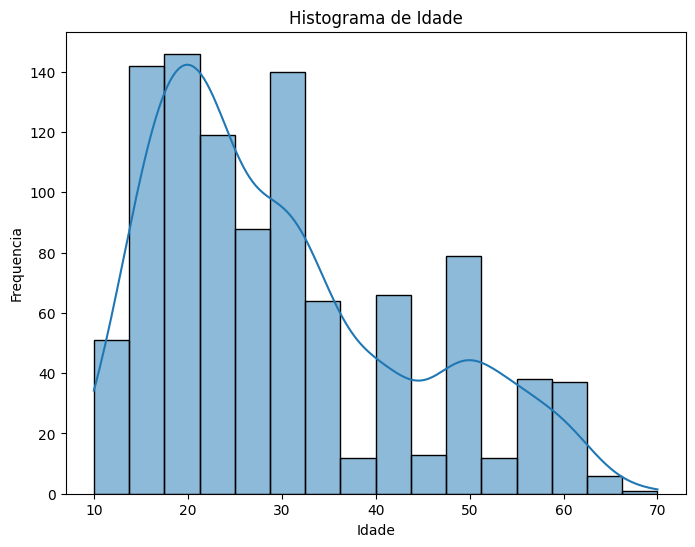

In [89]:
# 1. Análise de variáveis: analisando a frequencia de distribuição de idade no dataset

plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(Dataset['Idade'], kde=True)
plt.title('Histograma de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequencia')
plt.show()

O gráfico mostra que há maior volume de dados de gestantes com idade inferior a 35 anos.

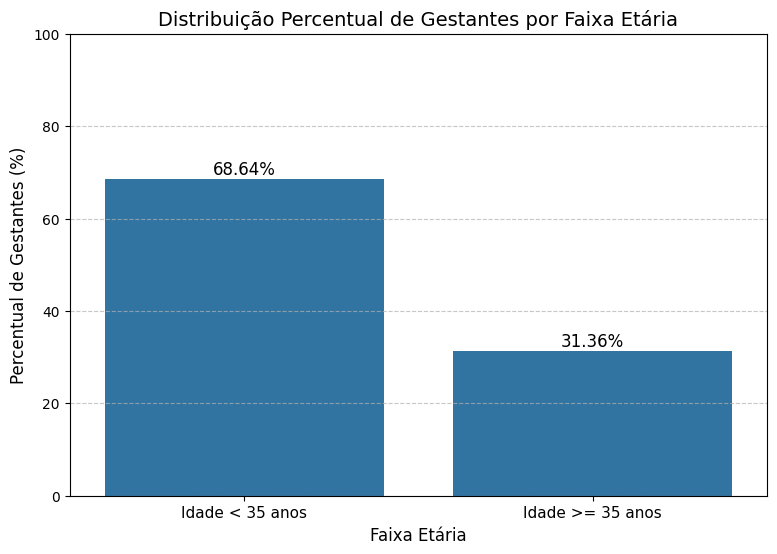

In [90]:
# 2. Análise de variáveis: analisando o % de idade gestacional 35+

# Calcular a contagem de valores para 'Idade_35+' e normalizar para obter percentuais
proportions_idade35_plus = Dataset['Idade_35+'].value_counts(normalize=True) * 100

# Preparar os dados para o gráfico de barras
plot_data = pd.DataFrame({
    'Grupo Idade': ['Idade < 35 anos', 'Idade >= 35 anos'], # Rótulos claros para o gráfico
    'Percentual': [proportions_idade35_plus.get(0, 0), proportions_idade35_plus.get(1, 0)]
})

# Criar o gráfico de barras
plt.figure(figsize=(9, 6)) # Aumentar ligeiramente o tamanho para melhor visualização
sns.barplot(x='Grupo Idade', y='Percentual', data=plot_data)
            #palette='viridis') # 'viridis' é uma boa paleta de cores

# Adicionar rótulos de percentual nas barras para clareza
for index, row in plot_data.iterrows():
    plt.text(index, row.Percentual, f'{row.Percentual:.2f}%',
             color='black', ha="center", va='bottom', fontsize=12)

plt.title('Distribuição Percentual de Gestantes por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Percentual de Gestantes (%)', fontsize=12)
plt.ylim(0, 100) # Garantir que o eixo Y vá de 0 a 100%
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adicionar grade para facilitar a leitura
plt.xticks(fontsize=11)

# Mostrar o gráfico
plt.show()

Confirmando a análise do gráfico anterior, do total de dados da base:
- 68,64% dos dados são de gestantes com idade inferior a 35 anos
- 31,36% dos dados são de gestantes com idade superior ou igual a 35 anos.

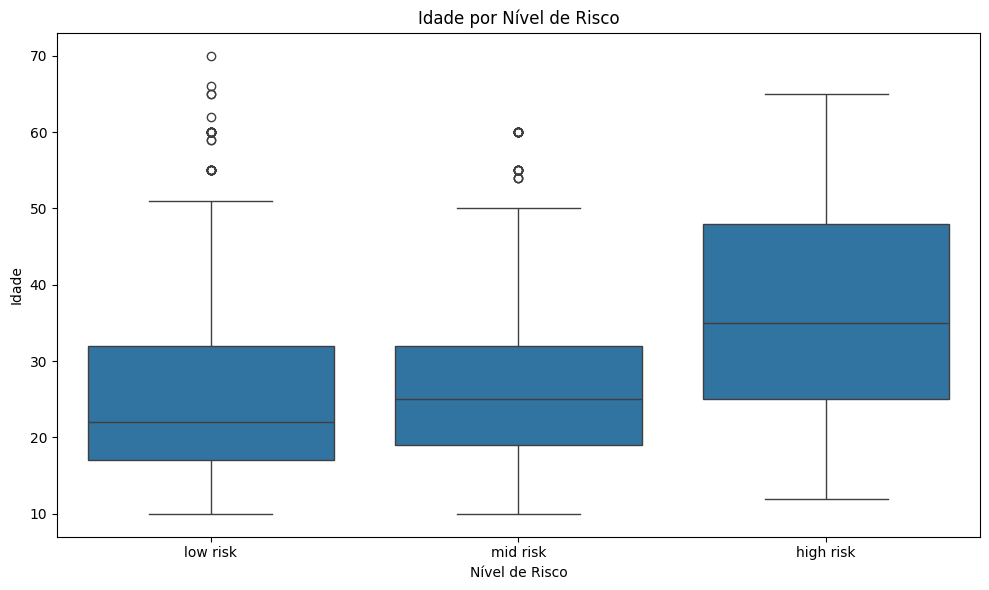

In [91]:
# 3. Análise de duas variáveis: analisando a idade em relação ao risco gestacional
# Gráfico Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Nivel_Risco', y='Idade', data=Dataset, order=['low risk', 'mid risk', 'high risk'])

# Correcting the title and labels
plt.title('Idade por Nível de Risco')
plt.xlabel('Nível de Risco')
plt.ylabel('Idade')
plt.tight_layout()
plt.show()

Este gráfico demonstra que temos 03 categorias de risco sendo o maior risco gestacional (hight risk) concentrado em idades >= 35 anos.

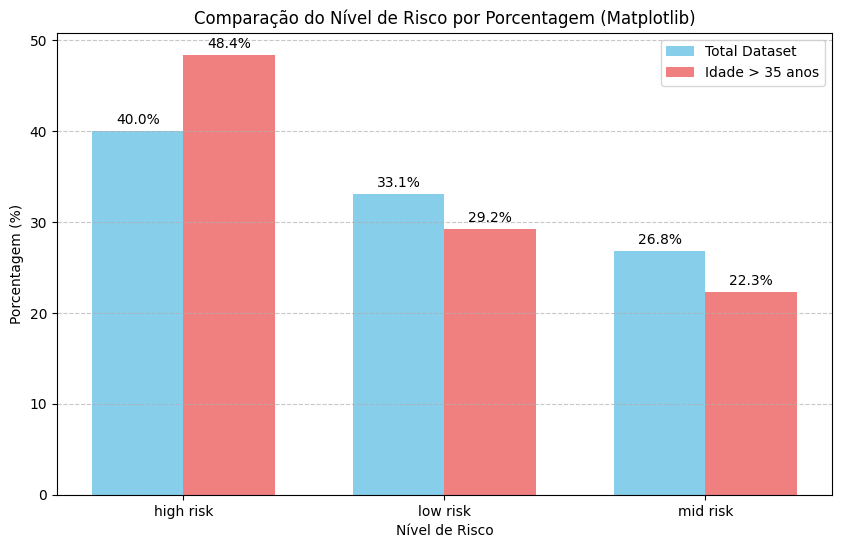

In [92]:
# 4. Análise de duas variáveis: analisando o % de nível de risco por idade

# Gráfico Barras

# 1. Calcular os percentuais para o dataset total
percent_total = Dataset['Nivel_Risco'].value_counts(normalize=True) * 100
# Transformar em DataFrame para facilitar a manipulação
percent_total_df = percent_total.reset_index()
percent_total_df.columns = ['Nivel_Risco', 'Percentage']

# 2. Filtrar o DataFrame para idade maior que 35
df_age_gt_35 = Dataset[Dataset['Idade'] >= 35]

# 3. Calcular os percentuais para o dataset filtrado (idade > 35)
percent_age_gt_35 = df_age_gt_35['Nivel_Risco'].value_counts(normalize=True) * 100
# Transformar em DataFrame
percent_age_gt_35_df = percent_age_gt_35.reset_index()
percent_age_gt_35_df.columns = ['Nivel_Risco', 'Percentage']

# Obter os níveis de risco únicos para os rótulos do eixo X
risk_levels = sorted(percent_total_df['Nivel_Risco'].unique())

# Configurações para o gráfico
width = 0.35 # Largura das barras
x_pos = range(len(risk_levels)) # Posições para as barras no eixo X

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as barras para o dataset total
bars_total = ax.bar([p - width/2 for p in x_pos], percent_total_df['Percentage'], width, label='Total Dataset', color='skyblue')

# Plotar as barras para o dataset filtrado (idade > 35)
bars_age_gt_35 = ax.bar([p + width/2 for p in x_pos], percent_age_gt_35_df['Percentage'], width, label='Idade > 35 anos', color='lightcoral')

# Adicionar rótulos, título e legenda
ax.set_xlabel('Nível de Risco')
ax.set_ylabel('Porcentagem (%)')
ax.set_title('Comparação do Nível de Risco por Porcentagem (Matplotlib)')
ax.set_xticks(x_pos)
ax.set_xticklabels(risk_levels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar os valores percentuais nas barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_total)
autolabel(bars_age_gt_35)


# Mostrar o gráfico
plt.show()


O gráfico de barras evidencia que temos 03 categorias de riscos no dataset, sendo a categoria de maior a que tem maior representatividade de gestantes com idade >= 35 anos.

## 4.4 Matriz de Correlação

As correlações positivas indicam que as variáveis tendem a se mover na mesma direção.

As correlações negativas indicam que elas tendem a se mover em direções opostas.

A força da correlação (o quão perto de 1 ou -1 o valor está) indica o quão forte é essa relação linear.

In [93]:
# 1. Matriz de Correlação

# Definir colunas numéricas
numeric_cols = [
    'Idade',
    'Pressao_Sistolica',
    'Pressao_Diastolica',
    'Nivel_Glicose',
    'Temperatura_Corporal',
    'Frequencia_Cardiaca',
    'Idade_35+',
    'Nivel_Risco_Numerico'
]


# Calcular a matriz de correlação
matriz_correlacao = Dataset[numeric_cols].corr()

# Mostrar resultado da matriz de correlação
print("\n--- Matriz de Correlação das Características Numéricas ---")
print(matriz_correlacao)



--- Matriz de Correlação das Características Numéricas ---
                         Idade  Pressao_Sistolica  Pressao_Diastolica  \
Idade                 1.000000           0.416045            0.398026   
Pressao_Sistolica     0.416045           1.000000            0.787006   
Pressao_Diastolica    0.398026           0.787006            1.000000   
Nivel_Glicose         0.473284           0.425172            0.423824   
Temperatura_Corporal -0.255323          -0.286616           -0.257538   
Frequencia_Cardiaca   0.079798          -0.023108           -0.046151   
Idade_35+             0.858554           0.326090            0.347741   
Nivel_Risco_Numerico -0.267225          -0.396473           -0.346649   

                      Nivel_Glicose  Temperatura_Corporal  \
Idade                      0.473284             -0.255323   
Pressao_Sistolica          0.425172             -0.286616   
Pressao_Diastolica         0.423824             -0.257538   
Nivel_Glicose              1.000000   

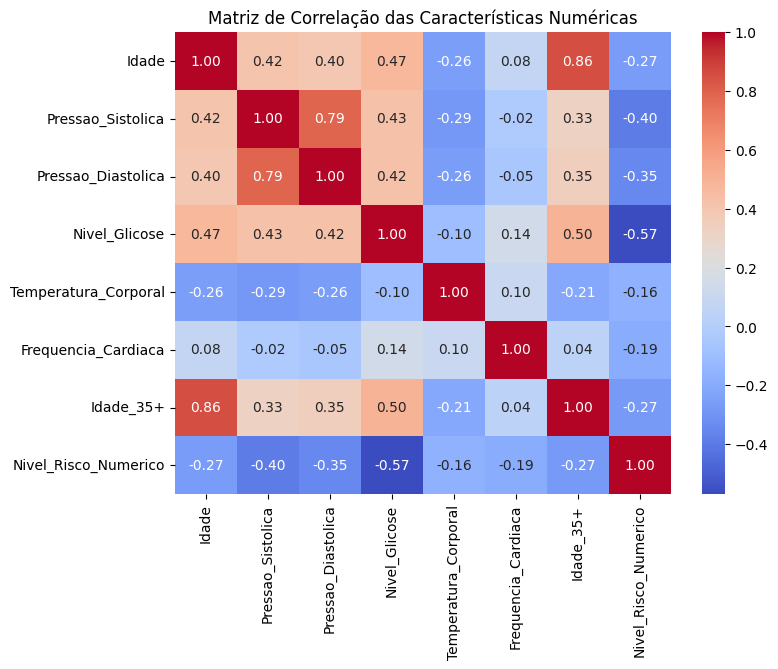

In [94]:
# 2. Gerar e exibir o mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas')
plt.show()

**Análise da Matriz de Correlação das Características Numéricas**

Atualizar


Matriz de Correlação para Idade >= 35 e Risco Gestacional:
                         Idade  Nivel_Risco_Numerico
Idade                 1.000000              0.117465
Nivel_Risco_Numerico  0.117465              1.000000


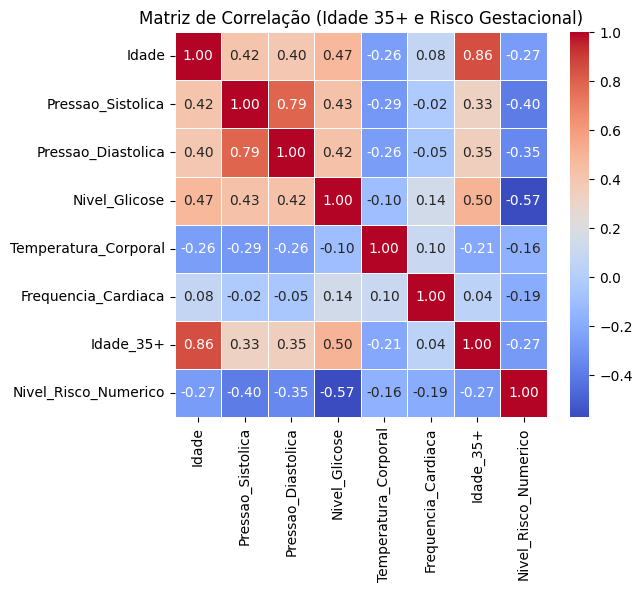

In [95]:
# 3. Matriz de correlação de idade x risco gestacional

## Filtrar o DataFrame para incluir apenas pessoas com idade maior ou igual a 35
df_idade_maior_35 = Dataset[Dataset['Idade'] >= 35].copy() # .copy() para evitar SettingWithCopyWarning

# Selecionar as colunas para a matriz de correlação
colunas_para_correlacao_df = df_idade_maior_35[['Idade', 'Nivel_Risco_Numerico']]

# Calcular a matriz de correlação
matriz_correlacao_idade_risco = colunas_para_correlacao_df.corr()

print("\nMatriz de Correlação para Idade >= 35 e Risco Gestacional:")
print(matriz_correlacao_idade_risco)


# Opcional: Visualizar a matriz de correlação com um heatmap (requer seaborn)
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação (Idade 35+ e Risco Gestacional)')
plt.show()

**Análise da Matriz de Correlação Idade 35+ e Risco Gestacional**

A direção da correlação está é cientificamente esperado (idade crescente → risco crescente), assumindo a codificação ascendente do risco, porém apesar da direção correta, a correlação é muito fraca. Isso sugere que a Idade como uma variável contínua, por si só, tem uma capacidade linear muito limitada de prever ou explicar o Nivel_Risco neste dataset. Ou seja, um modelo linear simples baseado apenas na idade provavelmente não será muito eficaz.


A idade pode ser mais relevante em combinação ou interação com outras variáveis, como pressão arterial, nível de glicose, etc.

Em resumo, essa matriz, com o coeficiente positivo, confirma a direção esperada da relação (Idade → Risco), mas a força fraca da correlação linear indica que a Idade sozinha não é um forte preditor linear do risco gestacional neste dataset.

# 5. Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, ou seja, transformar os dados brutos em um formato adequado para algoritmos de aprendizado de máquina, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

## Treino e Teste

O conjunto de treino é usado para "ensinar" o modelo a encontrar padrões nos dados.

O conjunto de teste é um conjunto de dados "invisível" que o modelo nunca viu durante o treinamento. Ele é usado para simular como o modelo se comportaria com novos dados do mundo real, dando uma estimativa imparcial de sua capacidade de generalização.

In [96]:
# 1. Separar features (X) e target (y)
# X serão todas as colunas, exceto 'Nivel_Risco'
X = Dataset.drop('Nivel_Risco_Numerico', axis=1)

# y será a coluna 'Nivel_Risco'
y = Dataset['Nivel_Risco_Numerico']

In [97]:
# 2. Dividir os dados em conjuntos de treino e teste

# - Train_test_split(...): Esta é a função que faz a divisão:
# - X, y: São os dados de entrada e a variável alvo.
# - Test_size=0.3: Define que 30% dos dados serão usados para o conjunto de teste e os 70% restantes para o conjunto de treino.
# - Random_state=42: garante que a divisão seja a mesma toda vez que você rodar o código.
    #Isso é crucial para a reprodutibilidade dos seus experimentos.
# - Stratify=y: é crucial para problemas de classificação, garantindo que as proporções de cada
    # nível de risco (neste caso, 'low risk', 'mid risk', 'high risk') sejam mantidas nos conjuntos de treino e teste.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
# 3. Imprimir as dimensões dos conjuntos para verificar
print(f"Dimensão total do Dataset: {Dataset.shape}")
print(f"Dimensão de X (features): {X.shape}")
print(f"Dimensão de y (target): {y.shape}")
print("-" * 40)
print(f"Dimensão do conjunto de treino (X_train): {X_train.shape}")
print(f"Dimensão do conjunto de teste (X_test): {X_test.shape}")
print(f"Dimensão do target de treino (y_train): {y_train.shape}")
print(f"Dimensão do target de teste (y_test): {y_test.shape}")
print("-" * 40)
print("Distribuição do Nivel_Risco no Dataset original:")
print(y.value_counts(normalize=True))
print("\nDistribuição do Nivel_Risco no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nDistribuição do Nivel_Risco no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Dimensão total do Dataset: (1014, 9)
Dimensão de X (features): (1014, 8)
Dimensão de y (target): (1014,)
----------------------------------------
Dimensão do conjunto de treino (X_train): (709, 8)
Dimensão do conjunto de teste (X_test): (305, 8)
Dimensão do target de treino (y_train): (709,)
Dimensão do target de teste (y_test): (305,)
----------------------------------------
Distribuição do Nivel_Risco no Dataset original:
Nivel_Risco_Numerico
2    0.400394
1    0.331361
0    0.268245
Name: proportion, dtype: float64

Distribuição do Nivel_Risco no conjunto de treino:
Nivel_Risco_Numerico
2    0.407616
1    0.315938
0    0.276446
Name: proportion, dtype: float64

Distribuição do Nivel_Risco no conjunto de teste:
Nivel_Risco_Numerico
2    0.383607
1    0.367213
0    0.249180
Name: proportion, dtype: float64


**Análise do Resultado de Treino e Teste**

1. Dimensões do Dataset (Total e Separado):

- Dimensão total do Dataset: (1014, 9)
Confirma que, ao separar as variáveis independentes (features), você ficou com 1014 linhas e 8 colunas de características, o que é consistente (9 colunas totais - 1 coluna alvo = 8 features).


2. Dimensões do Conjunto de Treino e Teste:

- Conjunto de Treino (X_train, y_train): (709 linhas) - Representa aproximadamente 70% (709/1014 ≈ 0.699 ou 70%) dos seus dados, que serão usados para treinar o modelo.
- Conjunto de Teste (X_test, y_test): (305 linhas) - Representa aproximadamente 30% (305/1014 ≈ 0.300 ou 30%) dos seus dados, que serão usados para avaliar o desempenho do modelo em dados "novos" (não vistos durante o treino).
- Consistência: As dimensões de X_train e X_test (8 colunas) e y_train e y_test (séries unidimensionais) estão corretas e são consistentes com a separação inicial de features e target.


3. Distribuição do Nivel_Risco (Nivel_Risco_Numerico) nos Conjuntos:

- Dataset Original: 2 (low risk): aproximadamente 40.04%, 1 (mid risk): aproximadamente 33.14% e 0 (right risk): aproximadamente 26.82%


- Conjunto de Treino:2 (low risk): aproximadamente 40.76%, 1 (mid risk): aproximadamente 31.59% e 0 (right risk): aproximadamente 27.64%


- Conjunto de Teste: 2 (low risk): aproximadamente 38.36%, 1 (mid risk): aproximadamente 36.72% e 0 (right risk): aproximadamente 24.92%


- Qualidade da Divisão (Estratificação):
As proporções dos níveis de risco (0, 1 e 2) são razoavelmente semelhantes entre o dataset original, o conjunto de treino e o conjunto de teste. Há pequenas variações (por exemplo, 1 aumenta um pouco no teste, 0 diminui um pouco no teste), mas não são grandes o suficiente para serem alarmantes.
Isso indica que a divisão foi realizada de forma estratificada, o que é fundamental para garantir que cada subconjunto (treino e teste) tenha uma representação proporcional das classes da variável alvo. Isso é especialmente importante aqui, pois as classes não são uniformemente distribuídas. Uma boa estratificação ajuda a garantir que o modelo seja treinado e avaliado em uma amostra representativa de todas as categorias de risco.

## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# 1. Normalizar os dados de treino e teste
scaler_norm = MinMaxScaler()

# Aprende os valores mínimos e máximos APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)

# Transformar X_train_normalized de volta para um DataFrame, mantendo os nomes das colunas
df_X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns, index=X_train.index)

print("\nDataFrame X_train Normalizado (Min-Max) - Primeiras 5 linhas:")
print(df_X_train_normalized.head())



In [ ]:
# 2. Combinar X_train_normalized e y_train para a Matriz de Correlação

df_train_combined = pd.concat([df_X_train_normalized, y_train], axis=1)

In [ ]:
# 3. Calcular a Matriz de Correlação ---
correlation_matrix = df_train_combined.corr()

print("\nMatriz de Correlação (Dados de Treino Normalizados e Target):")
print(correlation_matrix)

In [ ]:
# 4. Visualizar a Matriz de Correlação ---
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação dos Dados de Treino Normalizados e Target')
plt.show()

Correlações com Nivel_Risco_Numerico (Sua Variável Alvo)

Vamos focar em como cada característica se relaciona com o Nivel_Risco_Numerico, pois isso é crucial para entender quais características podem ser bons preditores:

Nível de Glicose (0.671069):

Esta é a correlação positiva mais forte com o Nivel_Risco_Numerico. Isso é um achado significativo! Sugere que, à medida que o Nível de Glicose aumenta, o Nível de Risco Numérico tende a aumentar consideravelmente. Esta é uma característica muito importante para prever o risco.
Pressão Sistólica (0.433841) e Pressão Diastólica (0.401318):

Ambas têm correlações positivas moderadas com o Nivel_Risco_Numerico. Isso indica que, à medida que as pressões arteriais aumentam, o nível de risco tende a subir. São características relevantes, mas o Nível de Glicose parece ter uma relação mais forte.
Idade (0.355948) e Mapeamento_idade (0.348056):

Possuem correlações positivas fracas a moderadas com o Nivel_Risco_Numerico. Isso sugere que a idade tem alguma influência no risco, mas não é o fator principal por si só. Como a "Idade" e o "Mapeamento_idade" são altamente correlacionados entre si, provavelmente você escolherá apenas uma delas para seu modelo.
Frequência Cardíaca (0.253006):

Apresenta uma correlação positiva fraca com o Nivel_Risco_Numerico. A Frequência Cardíaca parece ter uma relação discreta com o risco, menos impactante que o Nível de Glicose ou as Pressões.
Temperatura Corporal (0.184649):

Mostra uma correlação positiva muito fraca com o Nivel_Risco_Numerico. Isso indica que a Temperatura Corporal tem pouquíssima relação linear com o nível de risco. É provável que esta variável não seja um preditor muito útil no seu modelo.
Considerações Finais

Prioridade de Variáveis: O Nível de Glicose se destaca como o fator mais correlacionado ao Nivel_Risco_Numerico. Pressão Sistólica e Diastólica também são importantes.
Multicolinearidade: Fique atento às variáveis altamente correlacionadas entre si (como Pressão Sistólica/Diastólica e Idade/Mapeamento_idade). Em modelos de regressão linear, ter variáveis muito correlacionadas pode inflacionar a variância dos coeficientes, tornando-os menos estáveis e mais difíceis de interpretar. Você pode considerar remover uma delas ou usar técnicas como PCA (Análise de Componentes Principais).
Correlação vs. Causalidade: Lembre-se sempre que correlação não implica causalidade. Esses resultados indicam tendências, mas não provam que uma variável causa a outra.

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['Idade'], kde=True)
plt.title('Distribuição da Idade (Normalizado)')
plt.xlabel('Idade Normalizada')
plt.ylabel('Frequência')
plt.show()

O histograma de *Idade* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

In [ ]:
#Matriz de Correlacao de idade x risco gestacional com dados normalizados

# Criar um mapeamento de strings para números
mapeamento_risco = {
    'low risk': 1,
    'medium risk': 2,
    'high risk': 3}


# Aplicar o mapeamento à coluna 'Nivel_Risco'
Dataset['Nivel_Risco_Numerico'] = Dataset['Nivel_Risco'].map(mapeamento_risco)


print("\nDataset Após Mapeamento de Risco:")
print(Dataset)
print("-" * 30)


# Agora, selecione apenas as colunas numéricas para normalizar.
# No meu exemplo, vamos normalizar 'Idade', 'Pressao' e 'Nivel_Risco_Numerico'.
colunas_para_normalizar = ['Idade', 'Nivel_Risco_Numerico']
df_para_normalizar = Dataset[colunas_para_normalizar]


# 3. Aplicar a Normalização Min-Max aos dados numéricos
scaler_minmax = MinMaxScaler()
df_normalized_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_para_normalizar),
                                    columns=df_para_normalizar.columns)

print("\nDataFrame Normalizado (Min-Max):")
print(df_normalized_minmax)
print("-" * 30)


## Matriz de Correlação dos Dados Normalizados

#Agora que os dados estão normalizados e numéricos, podemos calcular a matriz de correlação.


# 4. Calcular a Matriz de Correlação para dados normalizados
correlation_matrix = df_normalized_minmax.corr()

print("\nMatriz de Correlação (Dados Normalizados):")
print(correlation_matrix)

# 5. Visualizar a Matriz de Correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação de Dados Normalizados')
plt.show()

O valor principal a ser observado na matriz é 0.330881. Este número representa o coeficiente de correlação de Pearson entre a Idade e o Nível de Risco Numérico.

Vamos detalhar o que isso significa:

Sinal Positivo (+): O fato de o valor ser positivo (0.330881) indica que há uma correlação positiva. Isso significa que, à medida que a Idade aumenta, o Nivel_Risco_Numerico também tende a aumentar, e vice-versa. As duas variáveis se movem na mesma direção.

Magnitude (0.330881): A magnitude do valor (quão perto de 1 ele está) indica a força da correlação. Um valor de 0.330881 é considerado uma correlação positiva fraca a moderada. Isso sugere que existe uma relação, mas ela não é extremamente forte ou determinante.

Em Resumo

Para os dados analisados, há uma tendência de que pessoas mais velhas apresentem um Nível de Risco Numérico um pouco mais elevado. No entanto, essa relação não é muito forte. A idade, por si só, explica apenas uma pequena parte da variação no nível de risco. Isso significa que outros fatores, além da idade, provavelmente têm uma influência maior no Nível de Risco Numérico.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. explicar maissssssss

In [ ]:
# Identificar as colunas numéricas para padronização
# Excluímos 'RiskLevel' porque é categórica (já tratada com codificação, como One-Hot)
numerical_cols = ['Idade', 'Pressao_Sistolica', 'Pressao_Diastolica', 'Nivel_Glicose', 'Temperatura_Corporal', 'Frequencia_Cardiaca']


# 3. Inicializar o StandardScaler
scaler = StandardScaler()

# 4. Ajustar (fit) o scaler APENAS nos dados de treino e transformar (transform)
# Criar cópias para evitar SettingWithCopyWarning
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# 5. Transformar os dados de teste usando o scaler já ajustado nos dados de treino
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("X_train_scaled (Após Padronização nos dados de Treino):")
print(X_train_scaled.head())
print("\nVerificando médias e desvios padrão de X_train_scaled para as colunas numéricas:")
print(X_train_scaled[numerical_cols].agg(['mean', 'std']).round(2)) # Arredondar para melhor visualização

print("\nX_test_scaled (Após Padronização usando os parâmetros do Treino):")
print(X_test_scaled.head())
print("\nVerificando médias e desvios padrão de X_test_scaled para as colunas numéricas:")
print(X_test_scaled[numerical_cols].agg(['mean', 'std']).round(2))

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(X_test_scaled['Idade'], kde=True)
plt.title('Distribuição da Idade (Padronizado)')
plt.xlabel('Distribuição da Idade Padronizado')
plt.ylabel('Frequência')
plt.show()

Mesmo após a padronização é possível observar que a curva de distribuição da idade se mantém.

## Tratamento de Valores Nulos

O dataset Pregnancy não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
Dataset.isnull().sum()

## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



A Análise de Componentes Principais (PCA) é uma técnica poderosa de redução de dimensionalidade. Em termos simples, ela te ajuda a pegar um conjunto de dados com muitas variáveis (features) e transformá-lo em um conjunto com menos variáveis, chamadas de Componentes Principais (PCs), sem perder muita informação.

Imagine que você tem várias variáveis que medem aspectos de um paciente, como Idade, Peso, Altura, Pressão Arterial, Nível de Glicose, etc. Muitas dessas variáveis podem estar correlacionadas (como vimos na sua matriz de correlação, onde Pressão Sistólica e Diastólica são muito correlacionadas). O PCA busca encontrar novas variáveis (os componentes principais) que são combinações lineares das variáveis originais e que são não correlacionadas entre si.

Como o PCA Funciona?

O processo de fazer PCA geralmente envolve os seguintes passos:

Padronização dos Dados:

Por que fazer: O PCA é muito sensível à escala das variáveis. Se uma variável tem uma faixa de valores muito maior que outra (por exemplo, "Salário" vs. "Idade"), ela pode dominar o cálculo das componentes principais, mesmo que não seja a mais importante intrinsecamente. A padronização (usando StandardScaler do scikit-learn) coloca todas as variáveis na mesma escala, com média 0 e desvio padrão 1. Este é um passo crucial e quase sempre necessário antes de aplicar o PCA.
Cálculo da Matriz de Covariância (ou Matriz de Correlação):

Por que fazer: Essa matriz mostra como cada par de variáveis varia em conjunto. O PCA usa essa informação para identificar as direções (eixos) de maior variância nos dados.
Cálculo dos Autovetores e Autovalores:

Autovetores: São as "direções" ou "componentes principais". Cada autovetor representa um novo eixo no espaço dos dados, ao longo do qual a variância dos dados é máxima. Eles são ortogonais (perpendiculares) entre si, o que significa que as novas componentes principais não são correlacionadas.
Autovalores: Cada autovetor tem um autovalor correspondente. O autovalor indica a "quantidade de variância" (ou importância) que o respectivo autovetor (componente principal) captura dos dados originais. Componentes com autovalores maiores são mais importantes.
Seleção dos Componentes Principais:

Por que fazer: O objetivo é reduzir a dimensionalidade. Você escolhe um subconjunto dos autovetores (as componentes principais) que capturam a maior parte da variância total dos dados. Geralmente, você seleciona os componentes com os maiores autovalores. Uma prática comum é escolher componentes que, juntos, expliquem uma certa porcentagem da variância (e.g., 90% ou 95%).
Projeção dos Dados:

Por que fazer: Uma vez que você selecionou as n componentes principais, você projeta seus dados originais (já padronizados) nesses novos eixos. O resultado é um novo conjunto de dados com n colunas (as n componentes principais), que representam a informação mais importante dos dados originais, mas em uma dimensão menor.


In [ ]:
# 1. PADRONIZAÇÃO dos dados de treino (X_train) antes do PCA ---
# O PCA é sensível à escala. É recomendado usar StandardScaler antes do PCA.
scaler_std = StandardScaler()
scaler_std.fit(X_train) # Aprende média e desvio padrão APENAS de X_train
X_train_scaled = scaler_std.transform(X_train)

In [ ]:
# 2. Transformar para DataFrame para manter os nomes das colunas (útil para inspeção)
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

print("DataFrame X_train Padronizado (StandardScaler) - Primeiras 5 linhas:")
print(df_X_train_scaled.head())

In [ ]:
# 3. Aplicar o PCA ---
# Você pode especificar o número de componentes ou a variância explicada
# Opção 1: Especificar o número de componentes (ex: 2 para visualização)
pca = PCA(n_components=2)

In [ ]:
# 4. Especificar a porcentagem da variância a ser explicada (ex: 95%)
pca = PCA(n_components=0.95) # PCA vai determinar quantas componentes são necessárias para 95% da variância

In [ ]:
# 5. Treinar o PCA nos dados padronizados de treino
pca.fit(df_X_train_scaled)

In [ ]:
# 6. Transformar os dados de treino para as novas componentes principais
X_train_pca = pca.transform(df_X_train_scaled)


print(f"\nNúmero original de features: {X_train.shape[1]}")
print(f"Número de componentes principais geradas: {pca.n_components_}")
print(f"Forma de X_train_pca: {X_train_pca.shape}")

NameError: name 'pca' is not defined

In [ ]:
# 7. Explicar a variância capturada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("\nVariância explicada por cada componente principal:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"\nVariância acumulada explicada pelas {pca.n_components_} componentes: {explained_variance_ratio.sum():.4f} ({explained_variance_ratio.sum()*100:.2f}%)")

In [ ]:
# 8. Criar um DataFrame com as componentes principais para facilitar a visualização e uso
df_pca = pd.DataFrame(data=X_train_pca,
                      columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                      index=X_train.index) # Manter o índice para possível combinação com y_train

print("\nDataFrame com Componentes Principais (X_train) - Primeiras 5 linhas:")
print(df_pca.head())

In [ ]:
# 9. Visualização do PCA (para 2 componentes) ---
if pca.n_components_ == 2:
    plt.figure(figsize=(10, 7))
    # Usamos y_train para colorir os pontos pelo nível de risco
    sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=y_train, palette='viridis', s=100, alpha=0.7)
    plt.title('Dados de Treino Projetados nas 2 Primeiras Componentes Principais')
    plt.xlabel(f'Componente Principal 1 ({explained_variance_ratio[0]*100:.2f}% de Variância)')
    plt.ylabel(f'Componente Principal 2 ({explained_variance_ratio[1]*100:.2f}% de Variância)')
    plt.grid(True)
    plt.show()

In [ ]:
# 10. Aplicar a mesma transformação PCA ao conjunto de teste (X_test) ---
# Importante: NÃO FAÇA pca.fit(X_test_scaled). Apenas transforme usando o PCA JÁ TREINADO.
X_test_scaled = scaler_std.transform(X_test) # Escala X_test com o mesmo scaler_std do X_train
X_test_pca = pca.transform(X_test_scaled)
df_test_pca = pd.DataFrame(data=X_test_pca,
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                           index=X_test.index)
print("\nDataFrame com Componentes Principais (X_test) - Primeiras 5 linhas:")
print(df_test_pca.head())

In [ ]:
# 1. PADRONIZAÇÃO dos dados de treino (X_train) antes do PCA ---
# O PCA é sensível à escala. É recomendado usar StandardScaler antes do PCA.
scaler_std = StandardScaler()
scaler_std.fit(X_train) # Aprende média e desvio padrão APENAS de X_train
X_train_scaled = scaler_std.transform(X_train)

# 2. Transformar para DataFrame para manter os nomes das colunas (útil para inspeção)
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

print("DataFrame X_train Padronizado (StandardScaler) - Primeiras 5 linhas:")
print(df_X_train_scaled.head())

# 3. Aplicar o PCA ---
# Você pode especificar o número de componentes ou a variância explicada
# Opção 1: Especificar o número de componentes (ex: 2 para visualização)
pca = PCA(n_components=2)

# 4. Especificar a porcentagem da variância a ser explicada (ex: 95%)
pca = PCA(n_components=0.95) # PCA vai determinar quantas componentes são necessárias para 95% da variância

# 5. Treinar o PCA nos dados padronizados de treino
pca.fit(df_X_train_scaled)

# 6. Transformar os dados de treino para as novas componentes principais
X_train_pca = pca.transform(df_X_train_scaled)


print(f"\nNúmero original de features: {X_train.shape[1]}")
print(f"Número de componentes principais geradas: {pca.n_components_}")
print(f"Forma de X_train_pca: {X_train_pca.shape}")


# 7. Explicar a variância capturada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("\nVariância explicada por cada componente principal:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print(f"\nVariância acumulada explicada pelas {pca.n_components_} componentes: {explained_variance_ratio.sum():.4f} ({explained_variance_ratio.sum()*100:.2f}%)")


8. Criar um DataFrame com as componentes principais para facilitar a visualização e uso
df_pca = pd.DataFrame(data=X_train_pca,
                      columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                      index=X_train.index) # Manter o índice para possível combinação com y_train

print("\nDataFrame com Componentes Principais (X_train) - Primeiras 5 linhas:")
print(df_pca.head())

# 9. Visualização do PCA (para 2 componentes) ---
if pca.n_components_ == 2:
    plt.figure(figsize=(10, 7))
    # Usamos y_train para colorir os pontos pelo nível de risco
    sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=y_train, palette='viridis', s=100, alpha=0.7)
    plt.title('Dados de Treino Projetados nas 2 Primeiras Componentes Principais')
    plt.xlabel(f'Componente Principal 1 ({explained_variance_ratio[0]*100:.2f}% de Variância)')
    plt.ylabel(f'Componente Principal 2 ({explained_variance_ratio[1]*100:.2f}% de Variância)')
    plt.grid(True)
    plt.show()

    # 10. Aplicar a mesma transformação PCA ao conjunto de teste (X_test) ---
# Importante: NÃO FAÇA pca.fit(X_test_scaled). Apenas transforme usando o PCA JÁ TREINADO.
X_test_scaled = scaler_std.transform(X_test) # Escala X_test com o mesmo scaler_std do X_train
X_test_pca = pca.transform(X_test_scaled)
df_test_pca = pd.DataFrame(data=X_test_pca,
                           columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                           index=X_test.index)
print("\nDataFrame com Componentes Principais (X_test) - Primeiras 5 linhas:")
print(df_test_pca.head())


Entendendo e Analisando os Resultados do PCA

Você já tem os principais elementos para começar sua análise:

pca.n_components_: O número de componentes principais que foram geradas para explicar 95% da variância. Isso te diz o quanto você conseguiu reduzir a dimensionalidade.
explained_variance_ratio: A porcentagem de variância que cada componente principal individualmente explica. Isso é crucial para entender a importância relativa de cada PC.
X_train_pca (ou df_pca) e X_test_pca (ou df_test_pca): Seus conjuntos de dados de treino e teste transformados para o novo espaço de componentes principais. Estas são as novas "features" que você usará.
Gráfico de Dispersão (scatterplot): Se você usou n_components=2, esse gráfico é uma visualização poderosa da estrutura dos seus dados em um espaço reduzido, colorindo-os pelo nível de risco (y_train).

1. Interpretação das Componentes Principais (Cargas/Loadings)

Embora seu código não tenha explicitamente mostrado as cargas (coeficientes) das variáveis originais em cada componente, esta é uma das análises mais importantes após o PCA.

O que fazer: Acesse pca.components_. Cada linha desta matriz corresponde a uma componente principal, e cada coluna corresponde a uma variável original. Os valores indicam o "peso" ou a "contribuição" de cada variável original para aquela componente principal.
Para que serve: Ao examinar as variáveis com os maiores pesos (positivos ou negativos) em uma componente, você pode tentar nomear ou interpretar o que essa componente representa. Por exemplo, se a PC1 tem altos pesos em "renda", "educação" e "bens", ela pode representar um "índice de prosperidade econômica". Isso é fundamental para entender o significado do seu novo espaço de características.


2. Reavaliar a Matriz de Correlação (Após o PCA)

Você perguntou: "refazer a matriz de correlação?". A resposta é sim, mas com um propósito diferente.

Matriz de Correlação das Componentes Principais: Por construção, as componentes principais são ortogonais e, portanto, não correlacionadas entre si. Se você calcular a matriz de correlação para df_pca (ou X_train_pca), você verá que os valores fora da diagonal principal serão muito próximos de zero.
Para que serve: Isso valida que o PCA fez seu trabalho de remover a redundância e a multicolinearidade entre as features. Não há mais "informação duplicada" entre suas novas variáveis. Não é necessário fazer isso para "resolver" a multicolinearidade novamente, mas é uma verificação de sanidade.
3. Treinamento de Modelos de Machine Learning

Este é o principal objetivo de se aplicar o PCA para redução de dimensionalidade.

O que fazer: Use df_pca (para treino) e df_test_pca (para teste) como suas novas entradas (X) para qualquer modelo de machine learning (regressão logística, SVM, Random Forest, etc.) que você pretenda construir.
Para que serve:
Melhora de Desempenho: Modelos podem treinar mais rápido e serem mais robustos, especialmente se suas features originais tinham alta dimensionalidade e/ou multicolinearidade.
Redução de Overfitting: Ao usar menos componentes, você pode diminuir o risco de overfitting, pois o modelo tem menos parâmetros para aprender.
Eficiência Computacional: Treinar modelos com menos features é inerentemente mais rápido.
4. Visualização Aprofundada (se n_components_ > 2)

Se você escolheu n_components=0.95 (e, portanto, obteve mais de 2 componentes), a visualização direta fica mais difícil, mas ainda é possível:

Gráfico de Scree: Um gráfico de barras que mostra a variância explicada por cada componente em ordem decrescente. Isso ajuda a visualizar o "cotovelo" que indica onde a maioria da variância é capturada, justificando a escolha do número de componentes.
Análise das Cargas (novamente): Para entender as componentes que não puderam ser visualizadas diretamente, as cargas se tornam ainda mais importantes para a interpretação.
5. Avaliação da Perda de Informação

Embora o PCA seja ótimo para redução de dimensionalidade, sempre há uma perda de informação quando você não retém 100% da variância.

O que fazer: Compare o desempenho dos seus modelos de machine learning usando as features originais vs. as features transformadas pelo PCA.
Para que serve: Para garantir que a redução de dimensionalidade não prejudicou a capacidade preditiva do seu modelo de forma significativa. Se o desempenho cair muito, talvez você precise incluir mais componentes (aumentar a porcentagem de variância explicada) ou reconsiderar se o PCA é a melhor abordagem para o seu problema.
Conclusão

Você está no caminho certo! O PCA é uma ferramenta poderosa para transformar e simplificar seus dados. Seu próximo grande passo é usar essas novas componentes principais para construir e treinar seus modelos de machine learning, além de aprofundar a interpretação do que cada componente realmente significa em termos das suas variáveis originais.

Qual o próximo passo que você gostaria de dar? Treinar um modelo, talvez?

# 6. Conclusão
Responder as 3 questoes:
É comprovado cientificamente que a idade da gestacional acima dos 35 anos (35+), por sí só, aumenta o risco gestacional.

Qual o percentual deste grupo de risco na amostra avaliada?

Qual a classificação de risco do grupo 35+ em relação ao restantes dos dados?

Qual a correlação entre a idade materna 35+ e o risco gestacional?